In [23]:
%load_ext autoreload
%autoreload 2
import mygpt
import torch
import numpy as np
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
text, data, vocab_size, encoder, decoder = mygpt.data_utils.get_shakespeare_data()
data = data.to(device,torch.long)

Vocab : 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz


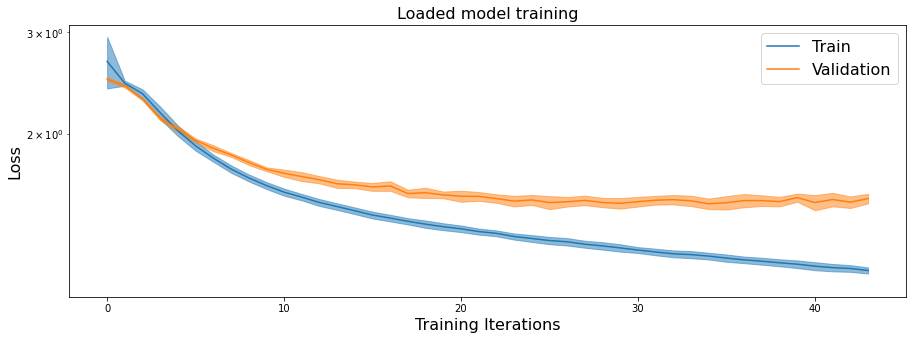

In [60]:
savedir = '/home/tau/emenier/data/GPT/DecoderGPT/Train1/'
max_block_size = 256 # what is the maximum context length for predictions?
lr = 3e-4
dtype = torch.float32
C = 384
n_heads = 6
n_layer = 6
dropout = 0.2

gpt_model = mygpt.gpt.DecoderGPT(vocab_size, C, n_layer, n_heads, 
                    max_block_size, dropout_freq=0.2).to(device,dtype)

trainer = mygpt.train_utils.DecoderGPTtrainer(gpt_model,lr,
                    checkpoint_path=savedir,wd=1e-5)
dic = trainer.load('last_model.trch')
train_dataset = mygpt.train_utils.TextDataset(
                data[:int(0.9*len(data))],max_block_size)
val_dataset = mygpt.train_utils.TextDataset(
                data[int(0.9*len(data)):],max_block_size)
mygpt.plot_utils.plot_losses(dic)

In [61]:
x,y = train_dataset[np.random.choice(len(train_dataset))]
x, y = x.reshape(1,*x.shape), y.reshape(1,*y.shape)
ret = trainer.gpt_model.generate(x,256)
decoded = decoder(ret[0,:].detach().cpu().numpy())
print(decoded[max_block_size-20:max_block_size] + ' ----- ' + decoded[max_block_size:])



100%|██████████| 256/256 [00:05<00:00, 43.19it/s]

xceeds the compass o ----- f my princee, insorted,
Without speaks highly to me on his nature
Against along, for current call'd my head
Willing friends; when after Henry Henry's mights,
And what I then his fault doffendered,
And start with field by other life above.
What if he, the n
